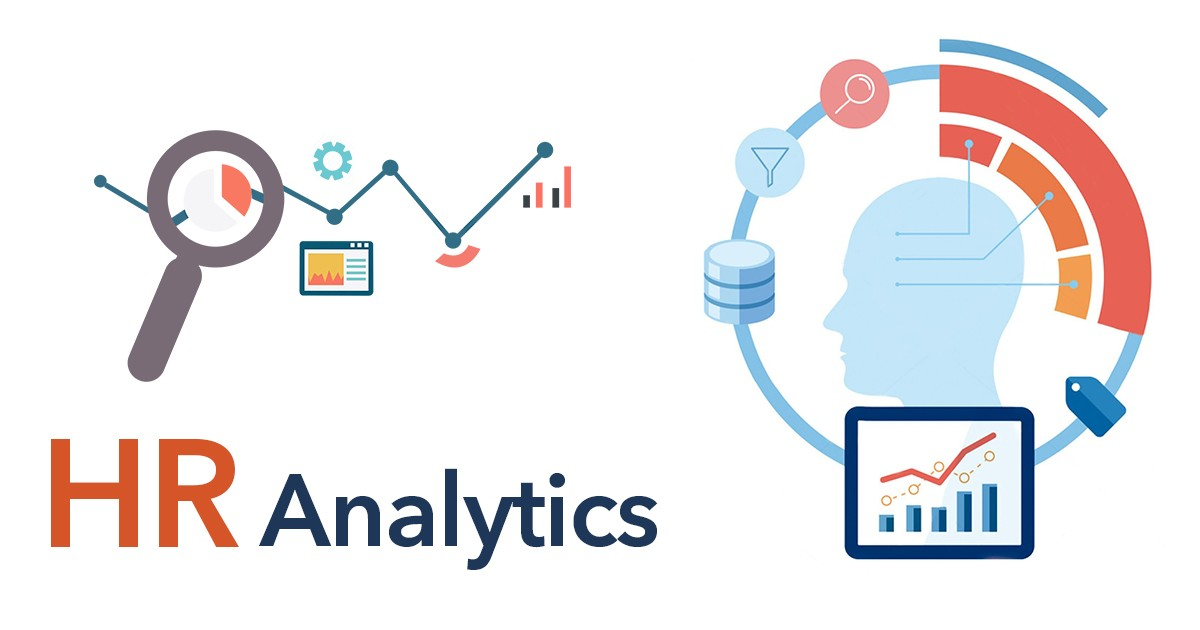

#### Objective
- The aim of this dataset is to build a model that can predict the attrition of the employees based on employee factors.

#### Machine learning models applied
- Logistic Regression
- Random Forest Classifier
- XGBoost Classifier
- Stacking Classifier

#### Project outline
- In this project, I will start with data processing and exploratory data analysis (EDA) to get a better understanding of the data. 
- Next, will perform modeling, where I will use different Supervised machine learning algorithms to predict attrition. 
- Finally, will evaluate the performance of the models and choose the best one based on various evaluation metrics.

#### Import required libraries

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

#### Load & read the datasets
- There are two datasets - Train & Test

In [2]:
train=pd.read_csv('Train_Dataset.csv')
train.head()

EmployeeID  Attrition   Age TravelProfile Department  HomeToWork  \
0     5110001          0  35.0        Rarely  Analytics         5.0   
1     5110002          1  32.0           Yes      Sales         5.0   
2     5110003          0  31.0        Rarely  Analytics         5.0   
3     5110004          0  34.0           Yes      Sales        10.0   
4     5110005          0  37.0            No  Analytics        27.0   

  EducationField  Gender  HourlnWeek  Involvement  ...  JobSatisfaction ESOPs  \
0             CA    Male        69.0            1  ...                1     1   
1     Statistics  Female        62.0            4  ...                2     0   
2     Statistics       F        45.0            5  ...                2     1   
3     Statistics  Female        32.0            3  ...                4     1   
4     Statistics  Female        49.0            3  ...                4     1   

   NumCompaniesWorked  OverTime  SalaryHikelastYear  WorkExperience  \
0                   1         1                20.0             7.0   
1                   8         0                20.0             4.0   
2                   3         0                26.0            12.0   
3                   1         0                23.0             5.0   
4                   8         0                21.0            12.0   

   LastPromotion  CurrentProfile  MaritalStatus  MonthlyIncome  
0            2.0             NaN              M        18932.0  
1            1.0             NaN         Single        18785.0  
2            1.0             3.0         Single        22091.0  
3            1.0             3.0       Divorsed        20302.0  
4            1.0             9.0       Divorsed        21674.0  

[5 rows x 22 columns]

In [3]:
test=pd.read_csv('Test_Dataset.csv')
test.head()

EmployeeID   Age TravelProfile Department  HomeToWork EducationField  \
0     6110001  18.0            No        NaN         9.0             CA   
1     6110002  20.0        Rarely  Analytics        28.0     Statistics   
2     6110003  50.0        Rarely  Analytics        19.0             CA   
3     6110004  32.0        Rarely      Sales        23.0     Statistics   
4     6110005  39.0        Rarely  Analytics         7.0             CA   

   Gender  HourlnWeek  Involvement  WorkLifeBalance  ... JobSatisfaction  \
0    Male        80.0            3                2  ...               3   
1  Female        59.0            1                3  ...               1   
2  Female        76.0            3                3  ...               5   
3  Female        73.0            5                2  ...               3   
4    Male        42.0            4                1  ...               5   

   ESOPs  NumCompaniesWorked  OverTime  SalaryHikelastYear  WorkExperience  \
0      1                   1         0                17.0             0.0   
1      1                   2         1                18.0             2.0   
2      0                   5         1                22.0            18.0   
3      0                   4         1                17.0             5.0   
4      1                   4         0                20.0             9.0   

   LastPromotion  CurrentProfile  MaritalStatus MonthlyIncome  
0            0.0             0.0         Single       16904.0  
1            1.0             NaN         Single       18994.0  
2            3.0             3.0              M       18587.0  
3            3.0             3.0        Married       20559.0  
4            1.0             7.0        Married       24991.0  

[5 rows x 21 columns]

#### Basic info about the dataset

In [4]:
train.shape     # Check shape

(5180, 22)

In [5]:
test.shape

(2630, 21)

- Train dataset has 7810 rows and 22 columns while Test data has 2630 rows and 21 columns.

In [6]:
train.columns  #check column names

Index(['EmployeeID', 'Attrition', 'Age', 'TravelProfile', 'Department',
       'HomeToWork', 'EducationField', 'Gender', 'HourlnWeek', 'Involvement',
       'WorkLifeBalance', 'Designation', 'JobSatisfaction', 'ESOPs',
       'NumCompaniesWorked', 'OverTime', 'SalaryHikelastYear',
       'WorkExperience', 'LastPromotion', 'CurrentProfile', 'MaritalStatus',
       'MonthlyIncome'],
      dtype='object')

In [7]:
train.duplicated().sum()  #check duplicates

0

- Dropping duplicates in Train

In [8]:
train=train.drop_duplicates()

In [9]:
test.duplicated().sum()  #check duplicates

0

- No duplicates present in Test data

In [10]:
train.isnull().sum()   #check null values

EmployeeID              0
Attrition               0
Age                   316
TravelProfile           0
Department            124
HomeToWork            255
EducationField          0
Gender                 46
HourlnWeek            287
Involvement             0
WorkLifeBalance         0
Designation            38
JobSatisfaction         0
ESOPs                   0
NumCompaniesWorked      0
OverTime                0
SalaryHikelastYear    169
WorkExperience        187
LastPromotion          70
CurrentProfile        311
MaritalStatus           0
MonthlyIncome          93
dtype: int64

In [11]:
test.isnull().sum()   #check null values

EmployeeID              0
Age                   142
TravelProfile           0
Department             58
HomeToWork            126
EducationField          0
Gender                 30
HourlnWeek            136
Involvement             0
WorkLifeBalance         0
Designation            30
JobSatisfaction         0
ESOPs                   0
NumCompaniesWorked      0
OverTime                0
SalaryHikelastYear     94
WorkExperience        122
LastPromotion          57
CurrentProfile        134
MaritalStatus           0
MonthlyIncome          33
dtype: int64

- Null values present in both datasets

#### Adding new variable to both datasets

In [12]:
train['data'] = 'train'
test['data'] = 'test'

#### Concatenate both datsets

In [13]:
df = pd.concat([train, test], axis=0)

In [14]:
df.shape

(7810, 23)

In [15]:
df.head(2)

EmployeeID  Attrition   Age TravelProfile Department  HomeToWork  \
0     5110001        0.0  35.0        Rarely  Analytics         5.0   
1     5110002        1.0  32.0           Yes      Sales         5.0   

  EducationField  Gender  HourlnWeek  Involvement  ...  ESOPs  \
0             CA    Male        69.0            1  ...      1   
1     Statistics  Female        62.0            4  ...      0   

  NumCompaniesWorked  OverTime  SalaryHikelastYear  WorkExperience  \
0                  1         1                20.0             7.0   
1                  8         0                20.0             4.0   

   LastPromotion  CurrentProfile  MaritalStatus  MonthlyIncome   data  
0            2.0             NaN              M        18932.0  train  
1            1.0             NaN         Single        18785.0  train  

[2 rows x 23 columns]

In [16]:
df.tail(2)

EmployeeID  Attrition   Age TravelProfile Department  HomeToWork  \
2628     6112629        NaN   NaN        Rarely  Analytics        11.0   
2629     6112630        NaN  50.0           Yes  Analytics         1.0   

     EducationField  Gender  HourlnWeek  Involvement  ...  ESOPs  \
2628     Statistics  Female         NaN            4  ...      0   
2629     Statistics       F        73.0            3  ...      1   

     NumCompaniesWorked  OverTime  SalaryHikelastYear  WorkExperience  \
2628                  2         0                18.0             2.0   
2629                  3         1                24.0            28.0   

      LastPromotion  CurrentProfile  MaritalStatus  MonthlyIncome  data  
2628            1.0             1.0         Single        17261.0  test  
2629            0.0             7.0        Married        33172.0  test  

[2 rows x 23 columns]

#### Drop non significant variables

In [17]:
df = df.drop(['EmployeeID'], axis=1)

#### Checking Outliers

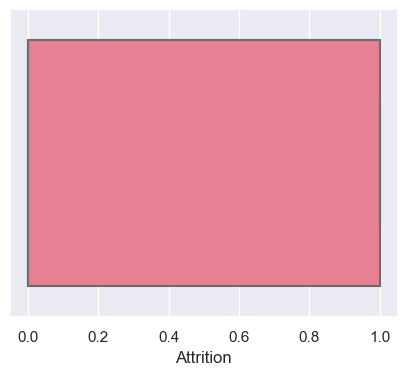

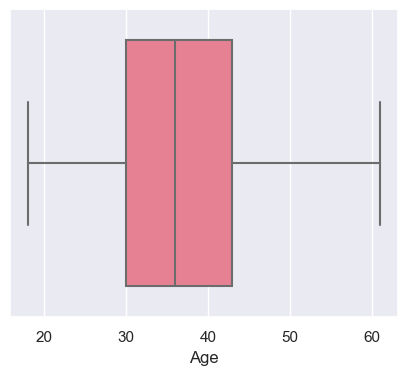

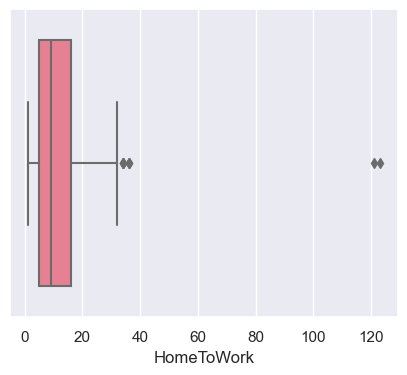

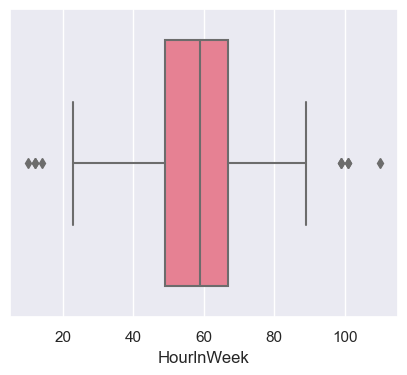

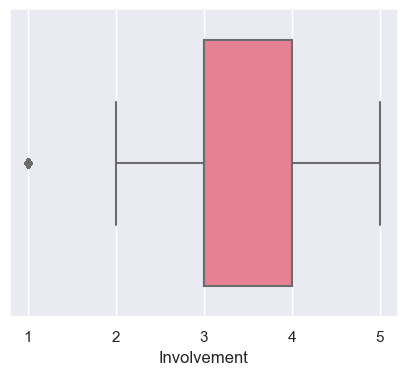

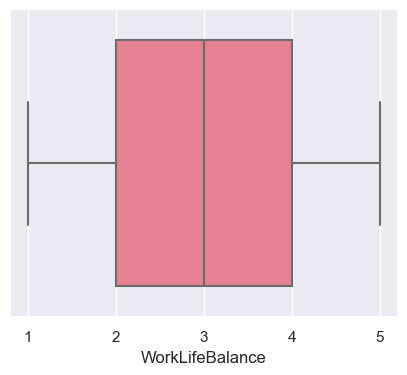

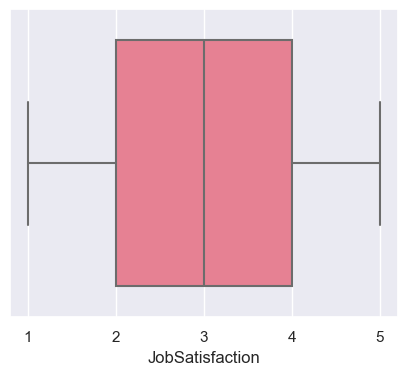

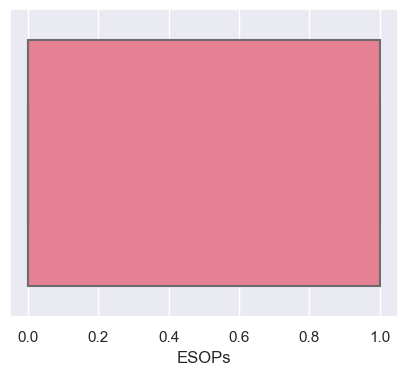

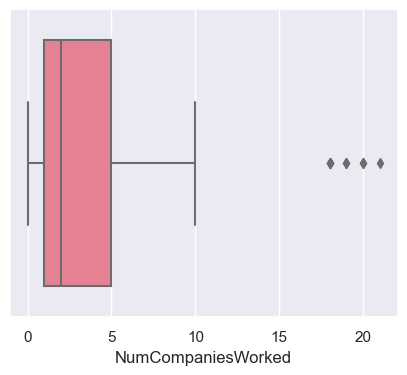

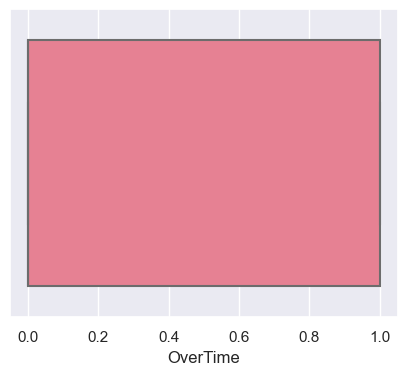

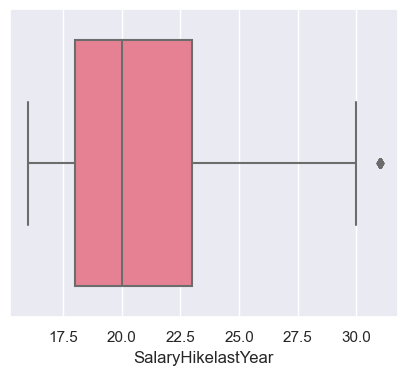

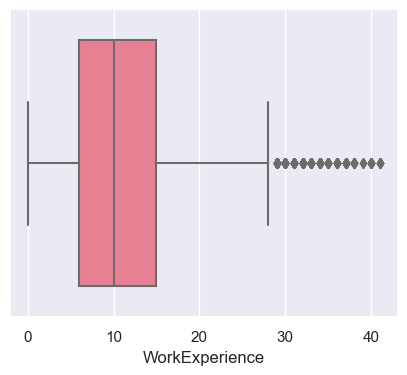

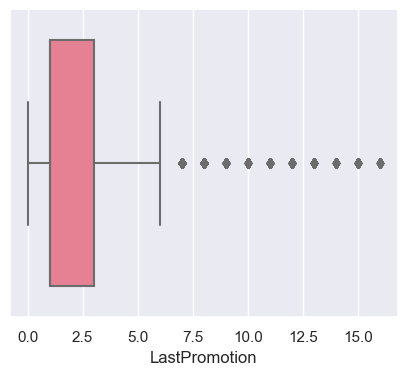

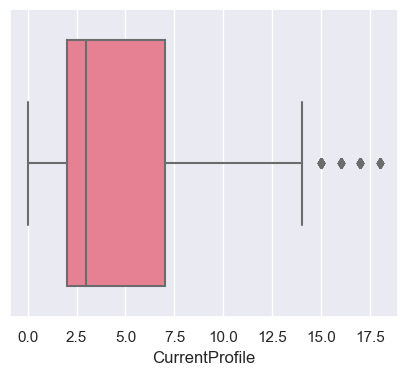

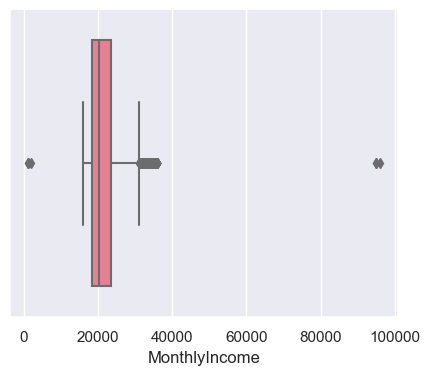

In [18]:
def boxplots(col):
    plt.figure(figsize=(5,4))    
    sns.boxplot(df,x=col,palette='husl')
    plt.show()
    
for i in list(df.select_dtypes(exclude=['object']).columns)[0:]:
    boxplots(i) 

In [19]:
df.isnull().sum()

Attrition             2630
Age                    458
TravelProfile            0
Department             182
HomeToWork             381
EducationField           0
Gender                  76
HourlnWeek             423
Involvement              0
WorkLifeBalance          0
Designation             68
JobSatisfaction          0
ESOPs                    0
NumCompaniesWorked       0
OverTime                 0
SalaryHikelastYear     263
WorkExperience         309
LastPromotion          127
CurrentProfile         445
MaritalStatus            0
MonthlyIncome          126
data                     0
dtype: int64

#### Filling missing values

In [20]:
# Filling missing values of variables having outliers
df['HomeToWork']=df['HomeToWork'].fillna(df['HomeToWork'].median())
df['HourlnWeek']=df['HourlnWeek'].fillna(df['HourlnWeek'].median())
df['SalaryHikelastYear']=df['SalaryHikelastYear'].fillna(df['SalaryHikelastYear'].median())
df['WorkExperience']=df['WorkExperience'].fillna(df['WorkExperience'].median())
df['LastPromotion']=df['LastPromotion'].fillna(df['LastPromotion'].median())
df['CurrentProfile']=df['CurrentProfile'].fillna(df['CurrentProfile'].median())
df['MonthlyIncome']=df['MonthlyIncome'].fillna(df['MonthlyIncome'].median())

# Filling missing values of variables with no outliers
df['Age']=df['Age'].fillna(df['Age'].mean())

# Filling missing values of object variables
df['Department'] = df['Department'].fillna('Analytics')
df['Gender'] = df['Gender'].fillna('Male')
df['Designation'] = df['Designation'].fillna('Executive')

In [21]:
df.info()    # Check info

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7810 entries, 0 to 2629
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Attrition           5180 non-null   float64
 1   Age                 7810 non-null   float64
 2   TravelProfile       7810 non-null   object 
 3   Department          7810 non-null   object 
 4   HomeToWork          7810 non-null   float64
 5   EducationField      7810 non-null   object 
 6   Gender              7810 non-null   object 
 7   HourlnWeek          7810 non-null   float64
 8   Involvement         7810 non-null   int64  
 9   WorkLifeBalance     7810 non-null   int64  
 10  Designation         7810 non-null   object 
 11  JobSatisfaction     7810 non-null   int64  
 12  ESOPs               7810 non-null   int64  
 13  NumCompaniesWorked  7810 non-null   int64  
 14  OverTime            7810 non-null   int64  
 15  SalaryHikelastYear  7810 non-null   float64
 16  WorkEx

In [22]:
df.describe().T.style.background_gradient(cmap='Blues')   #Statistical Analysis on Numerical Columns

In [23]:
df.describe(include='object').T  # Analysis on Categorical Columns

count unique         top  freq
TravelProfile   7810      3      Rarely  5489
Department      7810      3   Analytics  5076
EducationField  7810      6  Statistics  3169
Gender          7810      3        Male  4744
Designation     7810      5   Executive  3133
MaritalStatus   7810      4      Single  2709
data            7810      2       train  5180

#### Segregation of Numerical and Categorical Variables/Columns

In [24]:
categorical_col = df.select_dtypes(include = ['object']).columns
numerical_col = df.select_dtypes(exclude = ['object']).columns

#### Replacing F in Gender  & M in MaritalStatus column

In [25]:
df['Gender'].replace(['F'],'Female', inplace = True)
df['MaritalStatus'].replace(['M'],'Married', inplace = True)

#### Exploratory Data Analysis

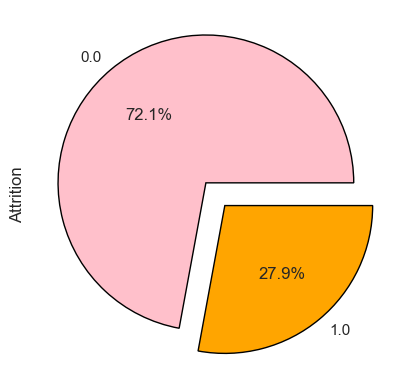

In [26]:
df['Attrition'].value_counts().plot(kind='pie',explode=[0.1,0.1],autopct='%0.1f%%',
                                 colors=('pink','orange'),wedgeprops={'edgecolor': 'black'})
plt.show()

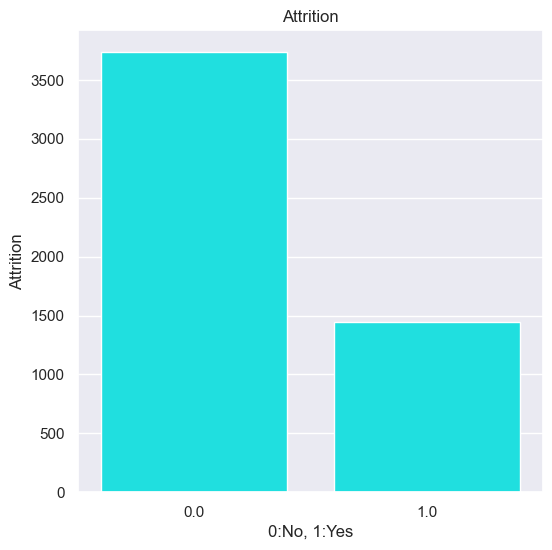

In [27]:
plt.figure(figsize=(6,6))
sns.barplot(x=df['Attrition'].value_counts().index, y=df['Attrition'].value_counts(), color='aqua')
plt.title('Attrition')
plt.xlabel('0:No, 1:Yes')
plt.show()

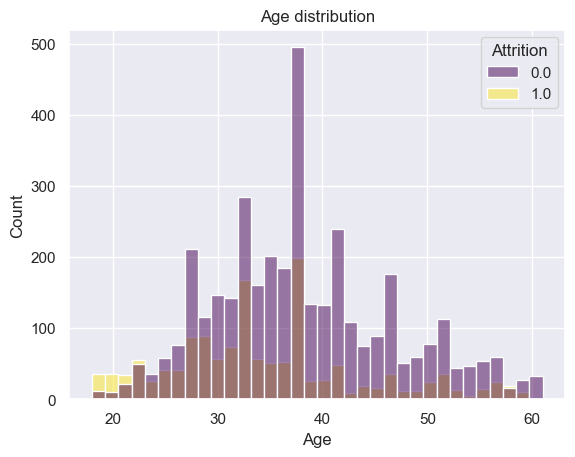

In [32]:
sns.histplot(x='Age',hue='Attrition', data=df, palette='viridis')
plt.title('Age distribution')
plt.show()

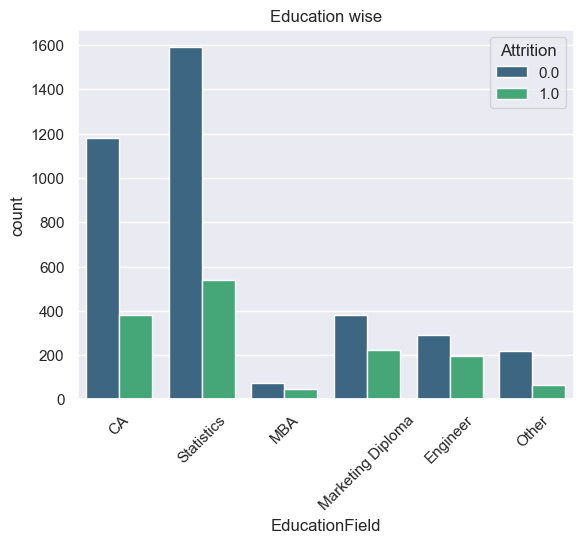

In [29]:
sns.countplot(x='EducationField',hue='Attrition', data=df, palette='viridis')
plt.title('Education wise')
plt.xticks(rotation=45)
plt.show()

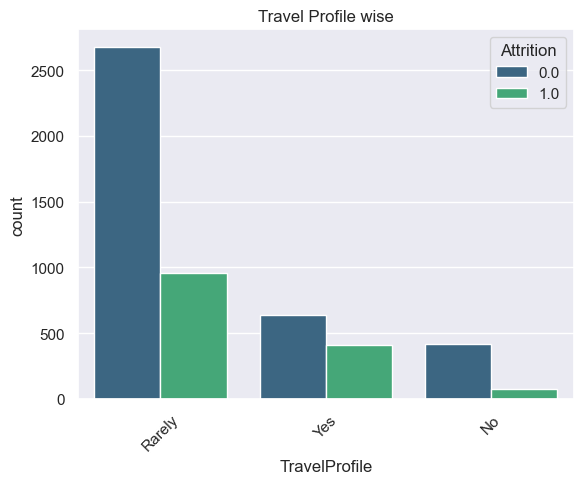

In [30]:
sns.countplot(x='TravelProfile',hue='Attrition', data=df, palette='viridis')
plt.title('Travel Profile wise')
plt.xticks(rotation=45)
plt.show()

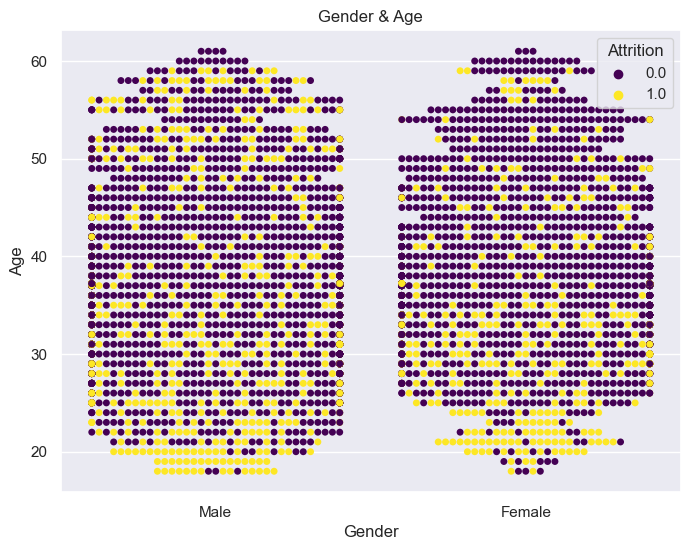

In [31]:
plt.figure(figsize=(8,6))
sns.swarmplot(data=df, x='Gender', y='Age', hue = 'Attrition', palette='viridis')
plt.title('Gender & Age')
plt.show()

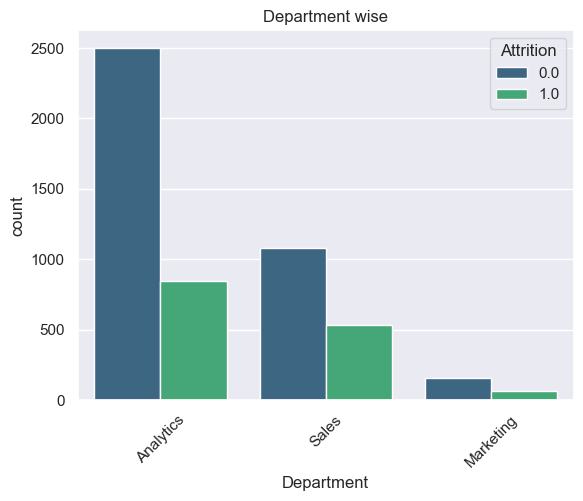

In [44]:
sns.countplot(x='Department',hue='Attrition', data=df, palette='viridis')
plt.title('Department wise')
plt.xticks(rotation=45)
plt.show()

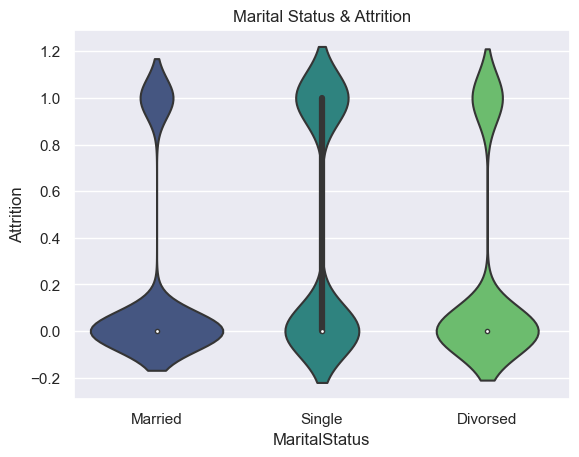

In [33]:
sns.violinplot(data=df, x=df["MaritalStatus"], y=df["Attrition"],palette ="viridis")
plt.title('Marital Status & Attrition')
plt.show()

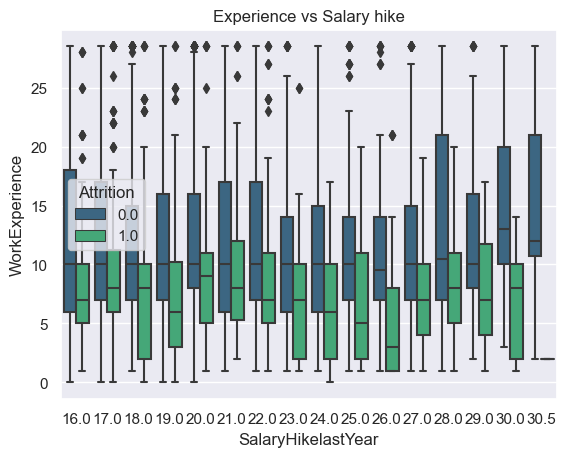

In [61]:
sns.boxplot(x='SalaryHikelastYear',y='WorkExperience',hue='Attrition',data=df ,palette='viridis')
plt.title('Experience vs Salary hike')
plt.show()

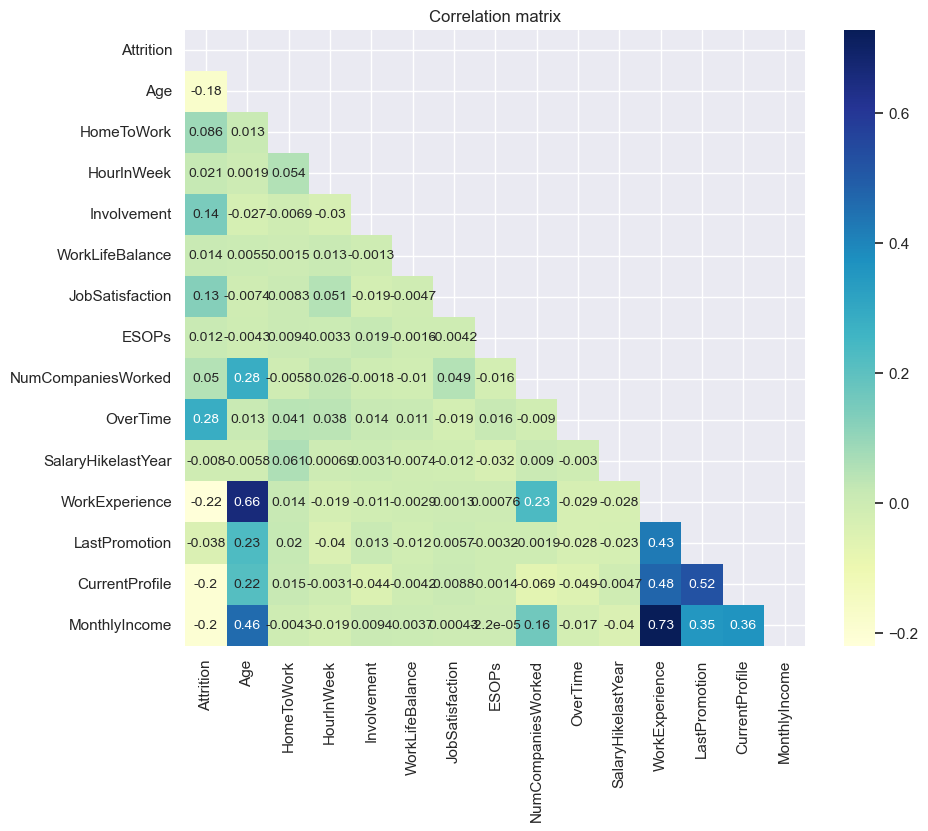

In [34]:
mask = np.zeros_like(df.corr(), dtype=float)
mask[np.triu_indices_from(mask)]=True
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True,cmap='YlGnBu', annot_kws={'size':10}, mask=mask)
plt.title('Correlation matrix')
plt.show()

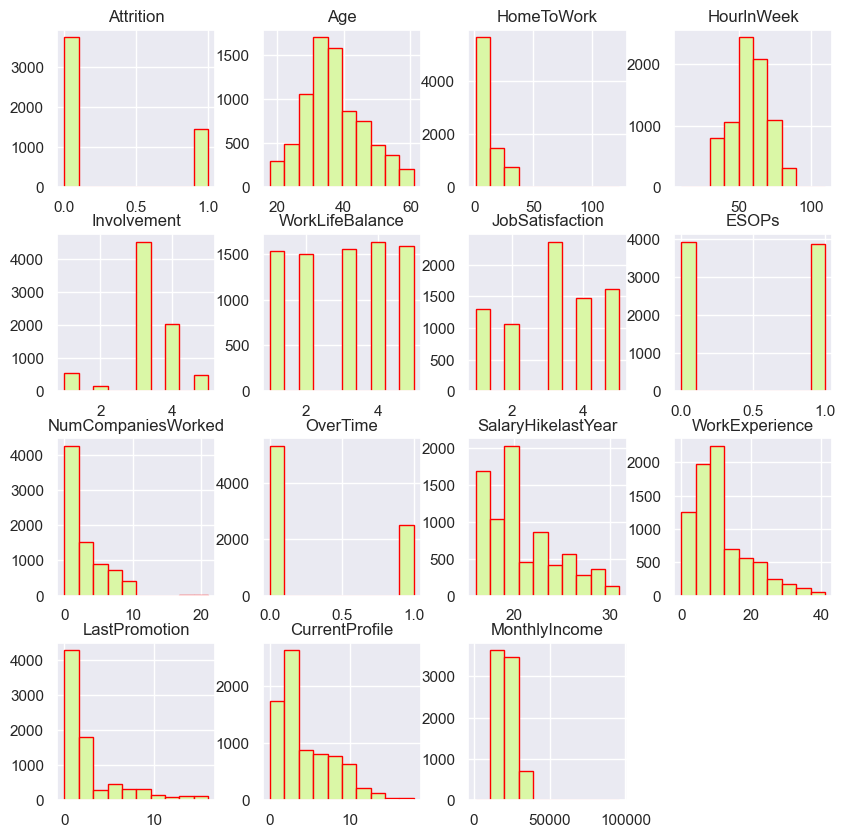

In [35]:
df.hist(bins=10, figsize=(10,10),color='#DAF7A6', edgecolor='red')
plt.title("Distribution of all variables")
plt.show()

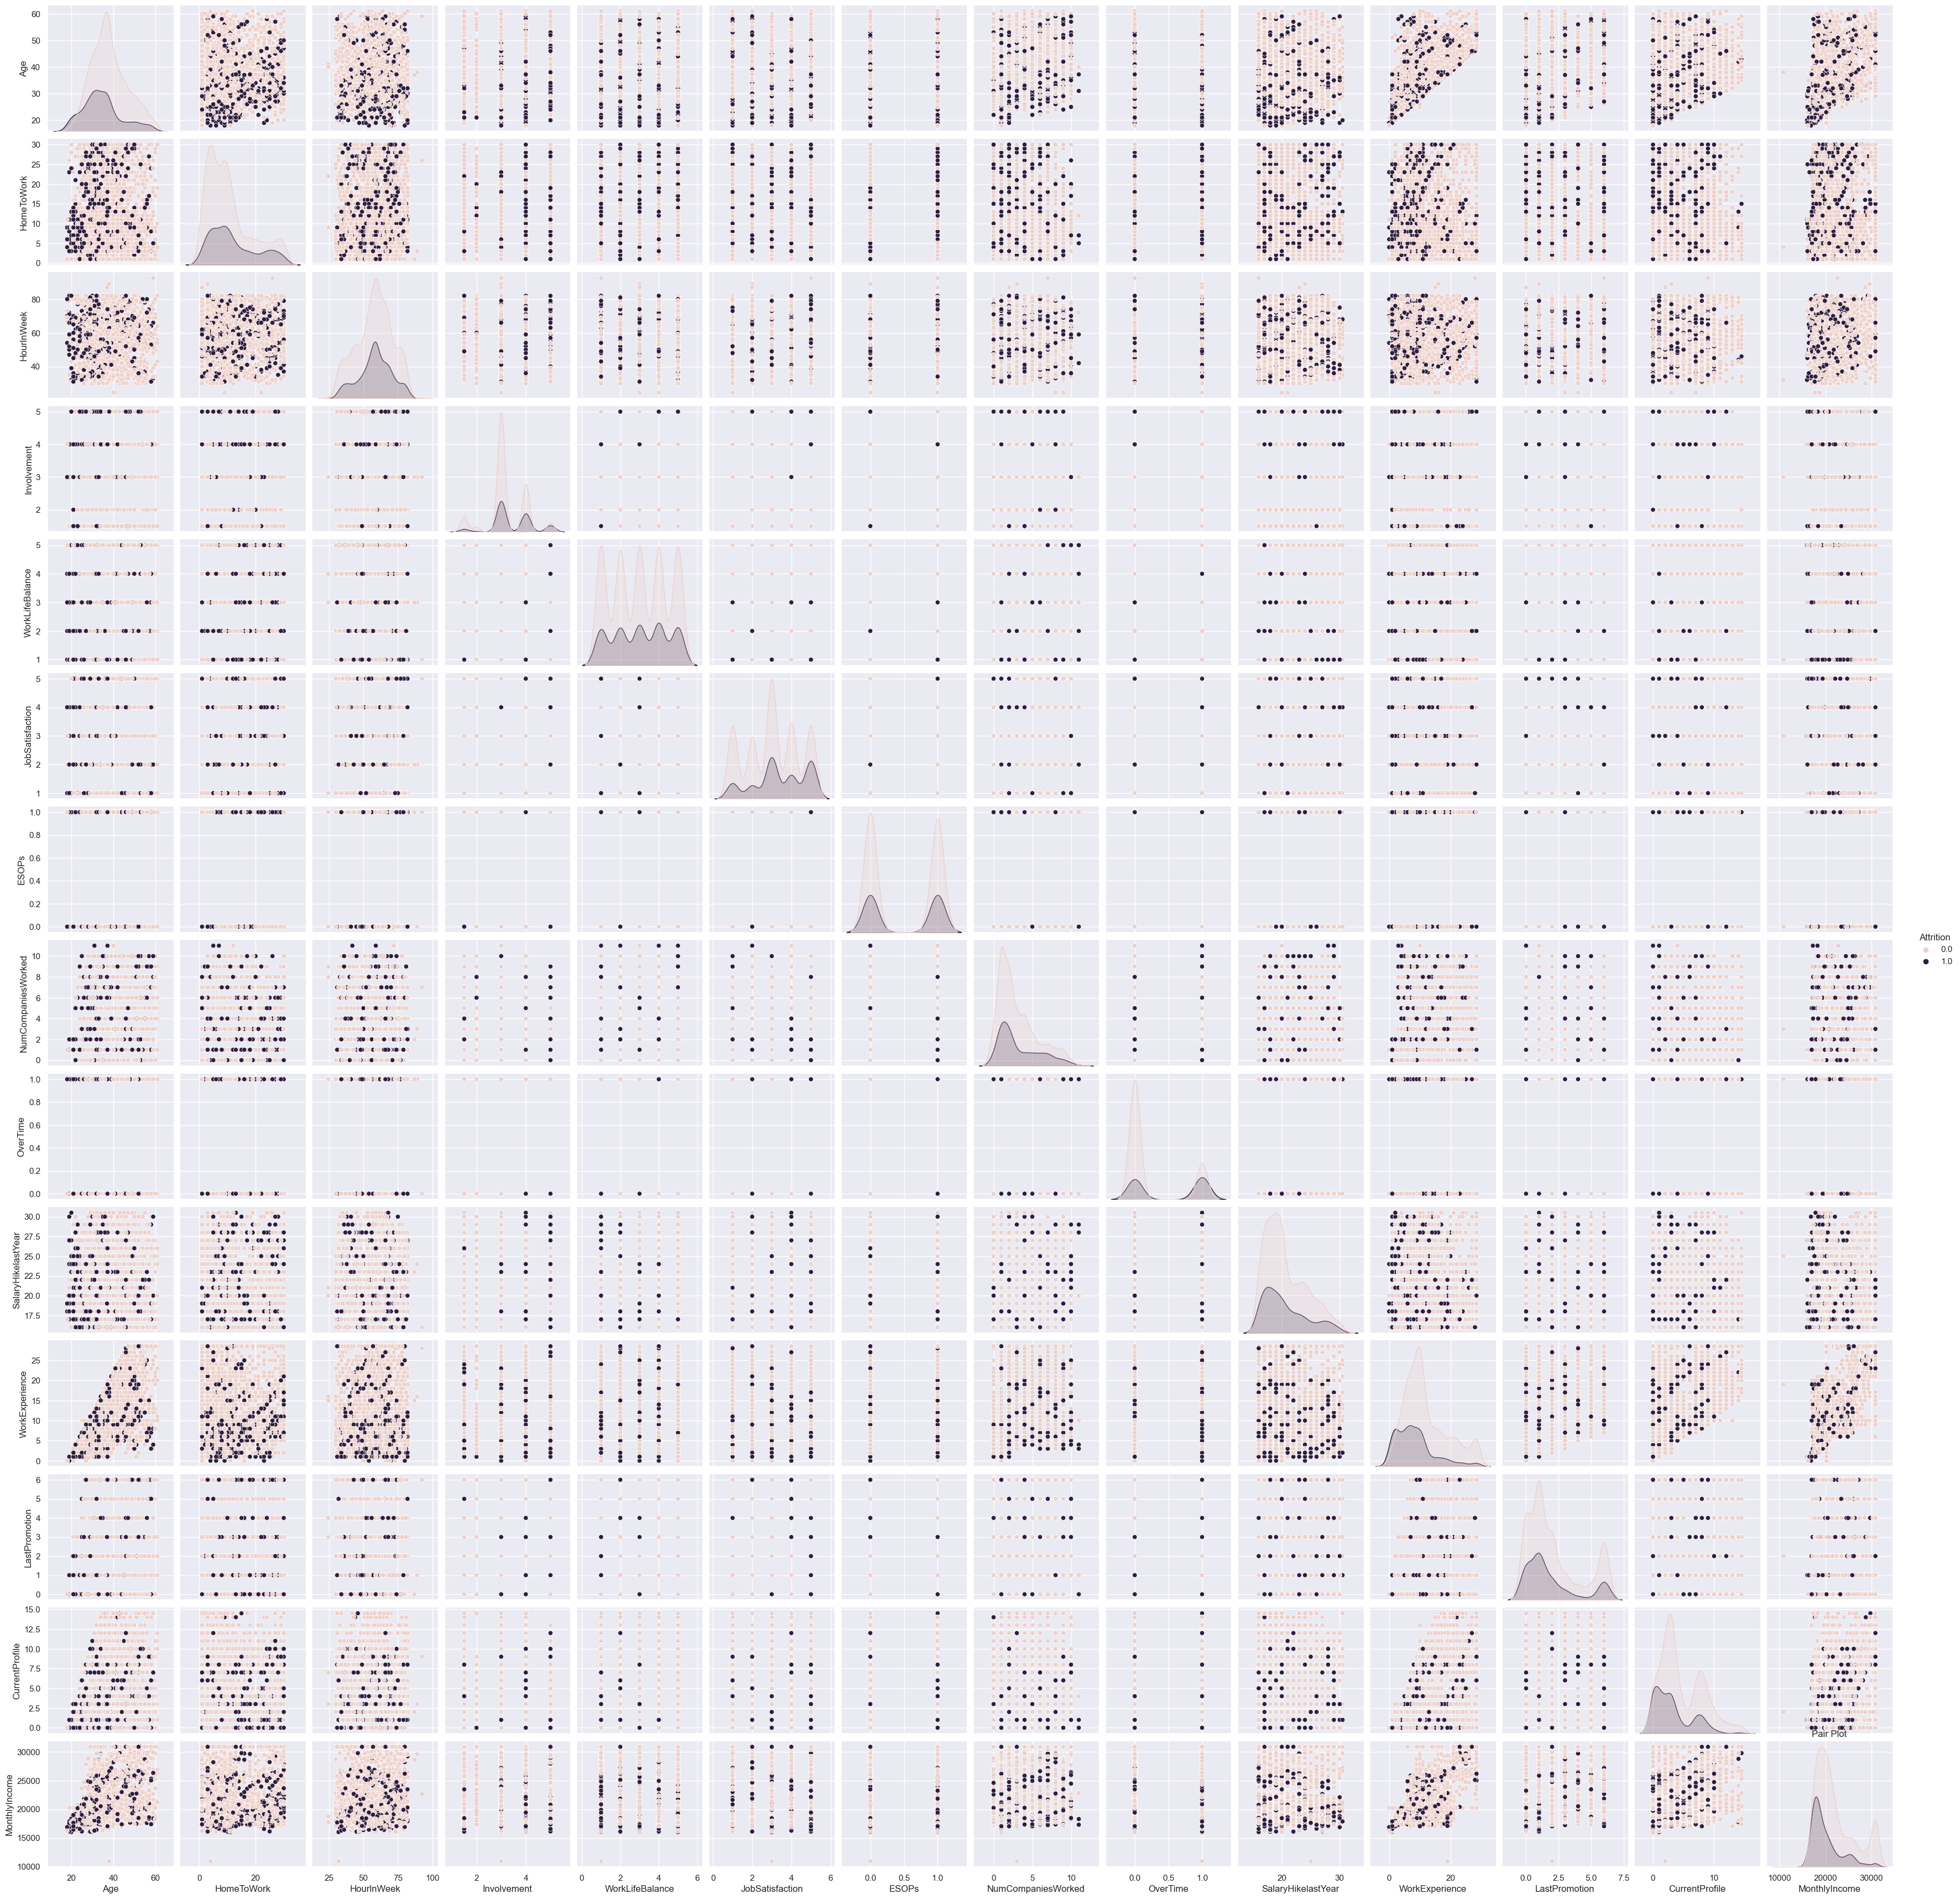

In [64]:
sns.pairplot(data=df, hue='Attrition')
plt.title('Pair Plot')
plt.show()

#### Checking Outliers

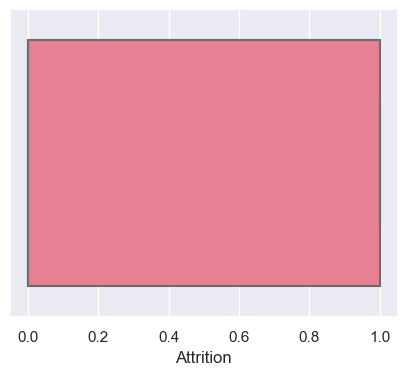

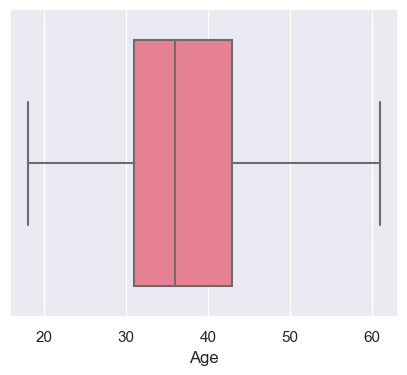

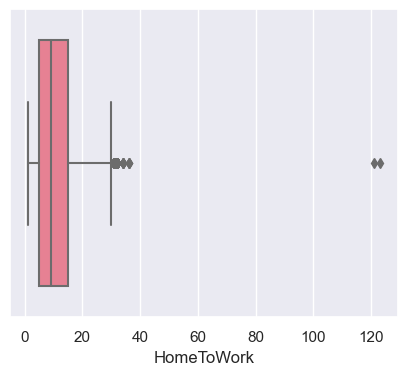

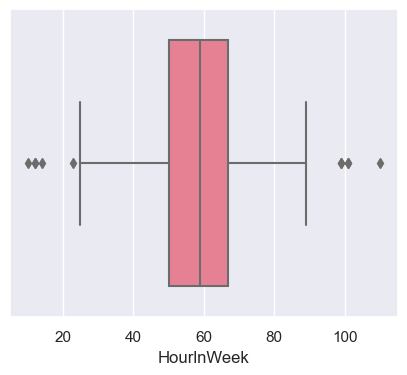

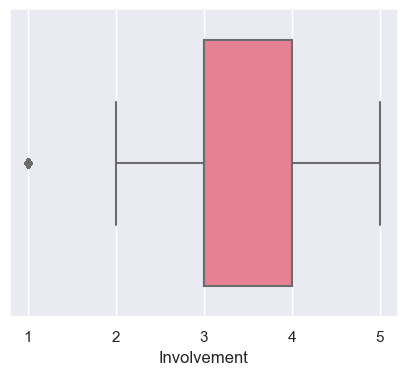

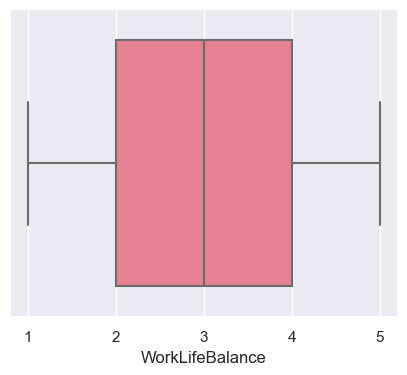

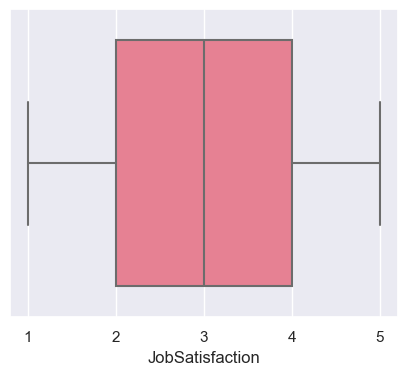

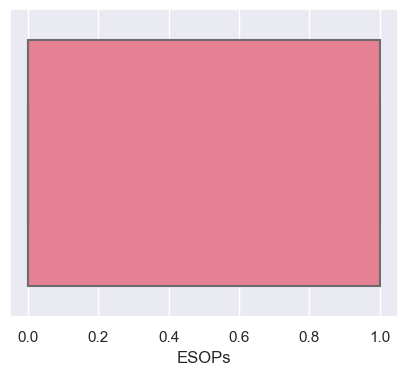

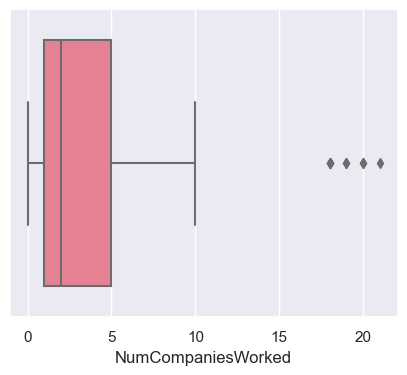

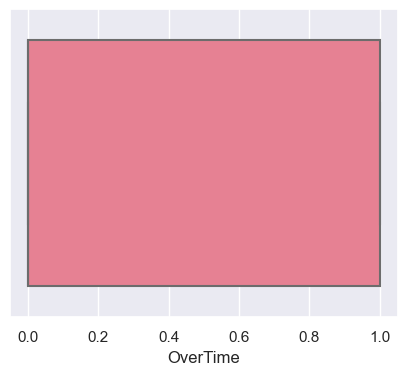

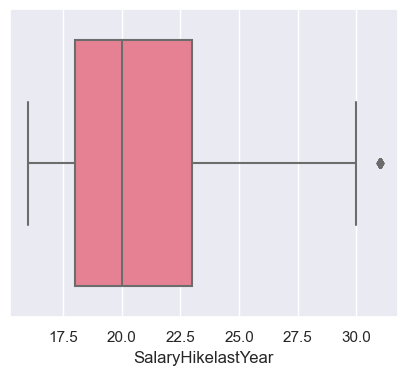

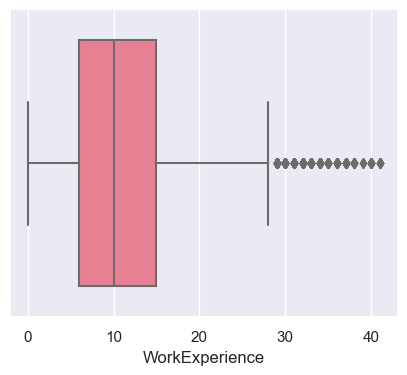

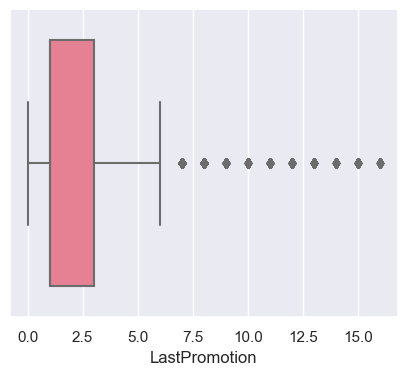

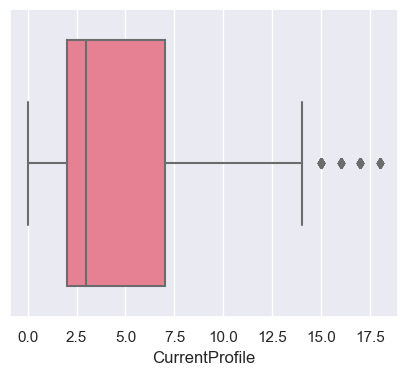

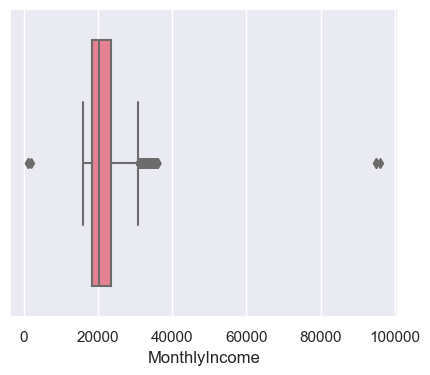

In [36]:
def boxplots(col):
    plt.figure(figsize=(5,4))    
    sns.boxplot(df,x=col,palette='husl')
    plt.show()
    
for i in list(df.select_dtypes(exclude=['object']).columns)[0:]:
    boxplots(i)   

#### Handling Outliers

In [37]:
def outlier(col):
    q3=df[col].quantile(0.75)
    q1=df[col].quantile(0.25)
    IQR=q3-q1
    Lower=q1-1.5*IQR
    Upper=q3+1.5*IQR
    df[col].clip(Lower,Upper,inplace=True)   

In [38]:
for i in numerical_col:
    outlier(i)

#### Encoding categorical variable

In [39]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

df['TravelProfile'] = le.fit_transform(df['TravelProfile'])
df['Department'] = le.fit_transform(df['Department'])
df['EducationField'] = le.fit_transform(df['EducationField'])
df['Gender'] = le.fit_transform(df['Gender'])
df['Designation'] = le.fit_transform(df['Designation'])
df['MaritalStatus'] = le.fit_transform(df['MaritalStatus'])

#### Splitting both datasets

In [41]:
train = df[df['data']=='train']
test = df[df['data']=='test']

In [42]:
print(train.shape, test.shape)

(5180, 22) (2630, 22)


#### Split the train data into x and y

In [43]:
x=train.drop(['Attrition','data'],axis=1)
y=train[['Attrition']]

In [44]:
x.head(2)

Age  TravelProfile  Department  HomeToWork  EducationField  Gender  \
0  35.0              1           0         5.0               0       1   
1  32.0              2           2         5.0               5       0   

   HourlnWeek  Involvement  WorkLifeBalance  Designation  JobSatisfaction  \
0        69.0          1.5                1            1                1   
1        62.0          4.0                3            1                2   

   ESOPs  NumCompaniesWorked  OverTime  SalaryHikelastYear  WorkExperience  \
0      1                   1         1                20.0             7.0   
1      0                   8         0                20.0             4.0   

   LastPromotion  CurrentProfile  MaritalStatus  MonthlyIncome  
0            2.0             3.0              1        18932.0  
1            1.0             3.0              2        18785.0

In [45]:
y.head(2)

Attrition
0        0.0
1        1.0

In [46]:
test = test.drop(['data'], axis=1)

### Feature Scaling

In [47]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x1=sc.fit_transform(x)
pd.DataFrame(x1).head(2)

0         1         2         3         4         5         6   \
0 -0.236028 -0.201708 -0.724589 -0.739978 -1.267416  0.806028  0.868996   
1 -0.570804  1.667432  1.450018 -0.739978  1.026349 -1.240651  0.313968   

         7         8         9         10        11        12        13  \
0 -2.233454 -1.427005 -0.741481 -1.597145  1.019101 -0.837778  1.479748   
1  0.936389 -0.009033 -0.741481 -0.852347 -0.981257  1.892078 -0.675791   

         14        15        16        17        18        19  
0 -0.171945 -0.551051 -0.031674 -0.370564 -0.203958 -0.616496  
1 -0.171945 -0.969776 -0.519981 -0.370564  1.186178 -0.652625

#### Check balance of data

In [48]:
y.value_counts()

Attrition
0.0          3735
1.0          1445
dtype: int64

- Data is imbalanced

#### Handle imbalanced data

In [49]:
import imblearn  
from imblearn.over_sampling import RandomOverSampler   
ros=RandomOverSampler()
x_ovr,y_ovr=ros.fit_resample(x1,y)
print(x_ovr.shape,y_ovr.shape,y.shape)


(7470, 20) (7470, 1) (5180, 1)


In [50]:
y_ovr.value_counts()

Attrition
0.0          3735
1.0          3735
dtype: int64

#### Split data into train and test

In [51]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_ovr,y_ovr,test_size=0.20,random_state=101)    

#### Model Building

#### Model No. 1 - Logistic Regression

In [52]:
# Model building
from sklearn.linear_model import LogisticRegression
logit = LogisticRegression(random_state=100)
log=logit.fit(x_train, y_train)
# Predict 
y_pred_train_log = logit.predict(x_train)
y_pred_test_log = logit.predict(x_test)
# Evaluate
from sklearn.metrics import confusion_matrix,classification_report, accuracy_score
accuracy_log_test=accuracy_score(y_test,y_pred_test_log)
accuracy_log_train=accuracy_score(y_train,y_pred_train_log)
print('Logistic regression Train accuracy:', accuracy_score(y_train, y_pred_train_log))
print('------'*10)
print('Logistic regression Test accuracy:', accuracy_score(y_test, y_pred_test_log))

Logistic regression Train accuracy: 0.7307563587684069
------------------------------------------------------------
Logistic regression Test accuracy: 0.7282463186077643


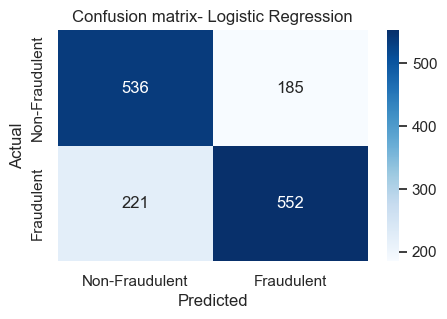

In [53]:
Labels = ['Non-Fraudulent', 'Fraudulent']
plt.figure(figsize=(5,3))
sns.heatmap(confusion_matrix(y_test,y_pred_test_log),xticklabels=Labels,
            yticklabels=Labels,cmap='Blues',annot=True, fmt='g')
plt.title("Confusion matrix- Logistic Regression")
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [54]:
from sklearn.metrics import roc_auc_score, roc_curve
logit_roc_auc = roc_auc_score(y_test, y_pred_test_log)
print(logit_roc_auc)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_test_log)

0.728756416720345


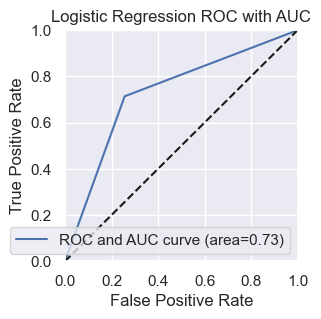

In [55]:
plt.figure(figsize=(3,3))
plt.plot(fpr, tpr, label="ROC and AUC curve (area=%0.2f)" % logit_roc_auc)
plt.plot([0,1],[0,1], 'k--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("Logistic Regression ROC with AUC")
plt.legend(loc='lower right')
plt.show()

#### Model No - 2 - Random Forest

In [56]:
# Model building
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=200,oob_score=False)
rf.fit(x_train,y_train)
# Predict
y_pred_train_rf=rf.predict(x_train)
y_pred_test_rf=rf.predict(x_test)
# Evaluate
accuracy_rf_test=accuracy_score(y_test,y_pred_test_rf)
accuracy_rf_train=accuracy_score(y_train,y_pred_train_rf)
print('Random Forest - Train accuracy:', accuracy_score(y_train, y_pred_train_rf))
print('-------'*10)
print('Random Forest - Test accuracy:', accuracy_score(y_test, y_pred_test_rf))

Random Forest - Train accuracy: 1.0
----------------------------------------------------------------------
Random Forest - Test accuracy: 0.9946452476572959


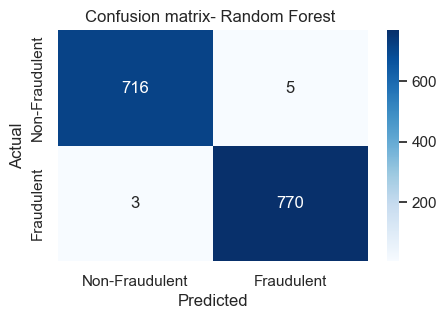

In [57]:
Labels = ['Non-Fraudulent', 'Fraudulent']
plt.figure(figsize=(5,3))
sns.heatmap(confusion_matrix(y_test,y_pred_test_rf),xticklabels=Labels,
            yticklabels=Labels,cmap='Blues',annot=True, fmt='g')
plt.title("Confusion matrix- Random Forest ")
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

0.9945921020287691


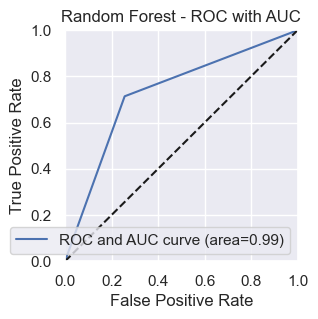

In [58]:
rf_roc_auc = roc_auc_score(y_test, y_pred_test_rf)
print(rf_roc_auc)
plt.figure(figsize=(3,3))
plt.plot(fpr, tpr, label="ROC and AUC curve (area=%0.2f)" % rf_roc_auc)
plt.plot([0,1],[0,1], 'k--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("Random Forest - ROC with AUC")
plt.legend(loc='lower right')
plt.show()

- Cross validation because of overfitting issue

In [59]:
from sklearn.model_selection import cross_val_score
train_accuracy_rf = cross_val_score(rf,x_train, y_train, cv=10)
crossval_train_rf=train_accuracy_rf.mean()
test_accuracy_rf = cross_val_score(rf,x_test, y_test, cv=10)
crossval_test_rf=test_accuracy_rf.mean()
print('Random forest after Cross validation Train accuracy:', crossval_train_rf)
print('-------'*10)
print('Random forest  after Cross validation Test accuracy:', crossval_test_rf)

Random forest after Cross validation Train accuracy: 0.9939751712856367
----------------------------------------------------------------------
Random forest  after Cross validation Test accuracy: 0.9209753914988814


#### Model no 3- XGBoost

In [60]:
# Model building
from xgboost import XGBClassifier
xgb = XGBClassifier()
xg=xgb.fit(x_train, y_train)
# Predict 
y_pred_xg = xgb.predict(x_test)
y_pred_xg_train = xgb.predict(x_train)
# Evaluate
accuracy_xg_test=accuracy_score(y_test,y_pred_xg)
accuracy_xg_train=accuracy_score(y_train,y_pred_xg_train)
print('XGBoost Train accuracy:', accuracy_score(y_train, y_pred_xg_train))
print('-------'*5)
print('XGBoost Test accuracy:', accuracy_score(y_test, y_pred_xg))

XGBoost Train accuracy: 1.0
-----------------------------------
XGBoost Test accuracy: 0.9912985274431058


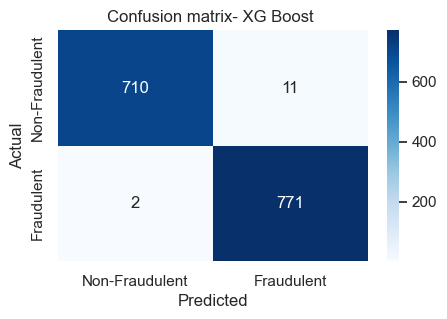

In [61]:
Labels = ['Non-Fraudulent', 'Fraudulent']
plt.figure(figsize=(5,3))
sns.heatmap(confusion_matrix(y_test,y_pred_xg),xticklabels=Labels,
            yticklabels=Labels,cmap='Blues',annot=True, fmt='g')
plt.title("Confusion matrix- XG Boost ")
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

0.9910780449031369


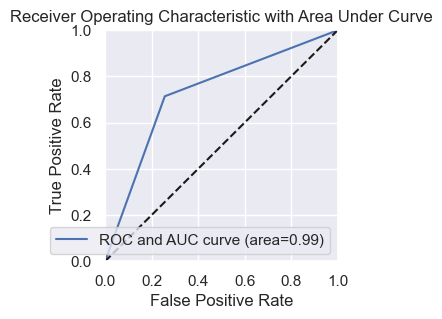

In [62]:
xg_roc_auc = roc_auc_score(y_test, y_pred_xg)
print(xg_roc_auc)
plt.figure(figsize=(3,3))
plt.plot(fpr, tpr, label="ROC and AUC curve (area=%0.2f)" % xg_roc_auc)
plt.plot([0,1],[0,1], 'k--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("Receiver Operating Characteristic with Area Under Curve")
plt.legend(loc='lower right')
plt.show()

- Cross validation because of overfitting issue

In [63]:
train_accuracy_xg= cross_val_score(xgb,x_train, y_train, cv=10)
crossval_train_xg=train_accuracy_xg.mean()
test_accuracy_xg = cross_val_score(xgb,x_test, y_test, cv=10)
crossval_test_xg=test_accuracy_xg.mean()
print('XGBoost Train accuracy after Cross validation:', crossval_train_xg)
print('---------------'*5)
print('XGBoost Test accuracy after Cross validation:', crossval_test_xg)

XGBoost Train accuracy after Cross validation: 0.9899603928225295
---------------------------------------------------------------------------
XGBoost Test accuracy after Cross validation: 0.9056062639821029


#### Combining all models in Tabular format for better understanding

In [64]:
Models=['Logistic','Random_forest','XGboost']
Trainacc=[accuracy_log_train,accuracy_rf_train,accuracy_xg_train]
Testacc=[accuracy_log_test,accuracy_rf_test,accuracy_xg_test]


In [65]:
Combined_accuracy=pd.DataFrame({'Model name':Models,'Train Accuracy':Trainacc,
                                'Test Accuracy':Testacc})
print(Combined_accuracy)

      Model name  Train Accuracy  Test Accuracy
0       Logistic        0.730756       0.728246
1  Random_forest        1.000000       0.994645
2        XGboost        1.000000       0.991299


#### Accuracy visualization

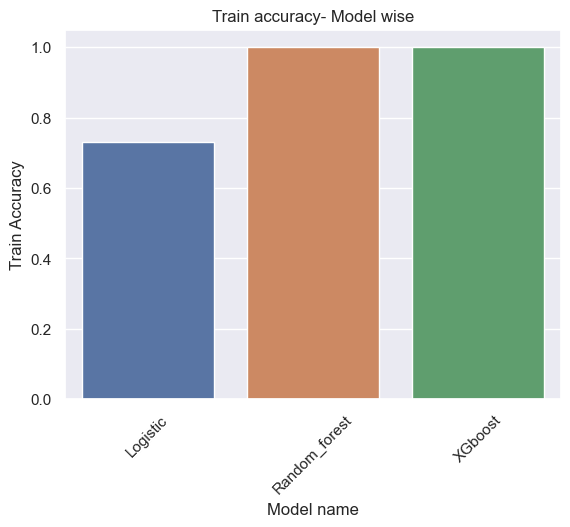

In [66]:
sns.barplot(x='Model name',y='Train Accuracy',data=Combined_accuracy)
plt.xticks(rotation=45)
plt.title('Train accuracy- Model wise')
plt.show()

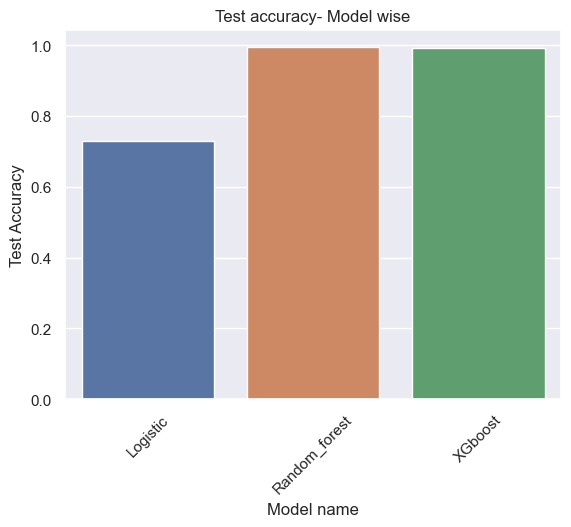

In [67]:
sns.barplot(x='Model name',y='Test Accuracy',data=Combined_accuracy)
plt.xticks(rotation=45)
plt.title('Test accuracy- Model wise')
plt.show()

#### Model No 4. Stacking Classifier

In [68]:
from sklearn.ensemble import StackingClassifier
stc=StackingClassifier(estimators = [('Logistic',logit),('Randomforest',rf),('Extra_Gradient_booting',xg)],
                       final_estimator=rf,cv=6)
stc.fit(x_train, y_train)
y_pred = stc.predict(x_test)

print(f"\nStacking classifier training Accuracy: {stc.score(x_train, y_train):0.2f}")
print(f"Stacking classifier test Accuracy: {stc.score(x_test, y_test):0.2f}")


Stacking classifier training Accuracy: 1.00
Stacking classifier test Accuracy: 0.99


#### Conclusion
- In this project I tried to 3 supervised machine learning algorithm to predict attrition of employees.
- Oversampling was done to balance the data as data was imbalanced.
- Both train and test data accuracy for all 3 models are coming way above the commonly taken threshold value of 70%.
- There is less than 10% accuracy variation in both train & test accuracy.
- Random forest & XGBoost gave the highest accuracy with Train accuracy of 100% and Test accuracy of 99% making it overfit.
- Logistic regression model yielded Train accuracy of 73% and Test accuracy of 72%. 
- Cross validation was done on Random Forest & XGBoost models to deal with overfitting problem.
- Cross validation of Random Forest yielded Train accuracy of 99% & Test accuracy of 92% very closely followed by XGBoost with Train accuracy of 98% and Test accuracy of 90%.
- In the end tried to do Stacking classifier which yielded 100% for Train and 99% for Test data.